REAL TIME AIR QUALITY MONITORING SYSTEM using SVM

1) Importing Libraries for Development

In [1]:
#For Data Manipulation
import numpy as np
import pandas as pd
import missingno as msno

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable = True, theme = 'pearl')

#For preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter

#For Classification
from sklearn.svm import SVC

#For Testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
main = pd.read_csv("assets/city_day.csv")

main.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Missing Data Analysis

<AxesSubplot: >

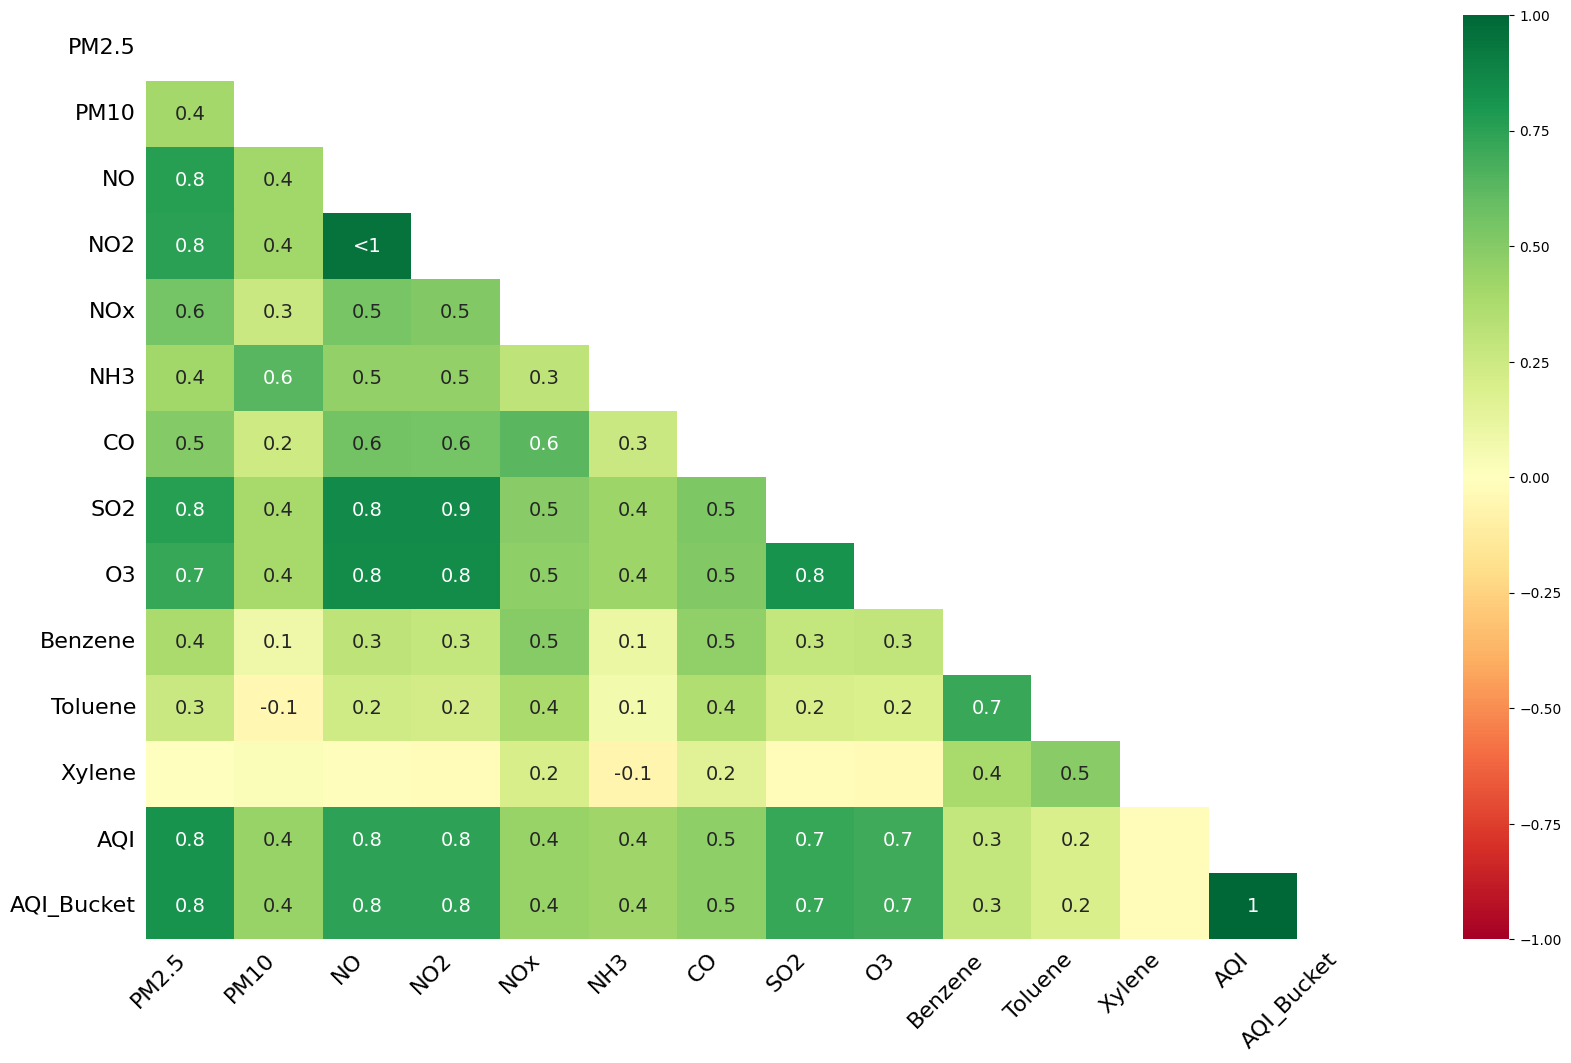

In [4]:
msno.heatmap(main, cmap="RdYlGn", fontsize=16)

<AxesSubplot: >

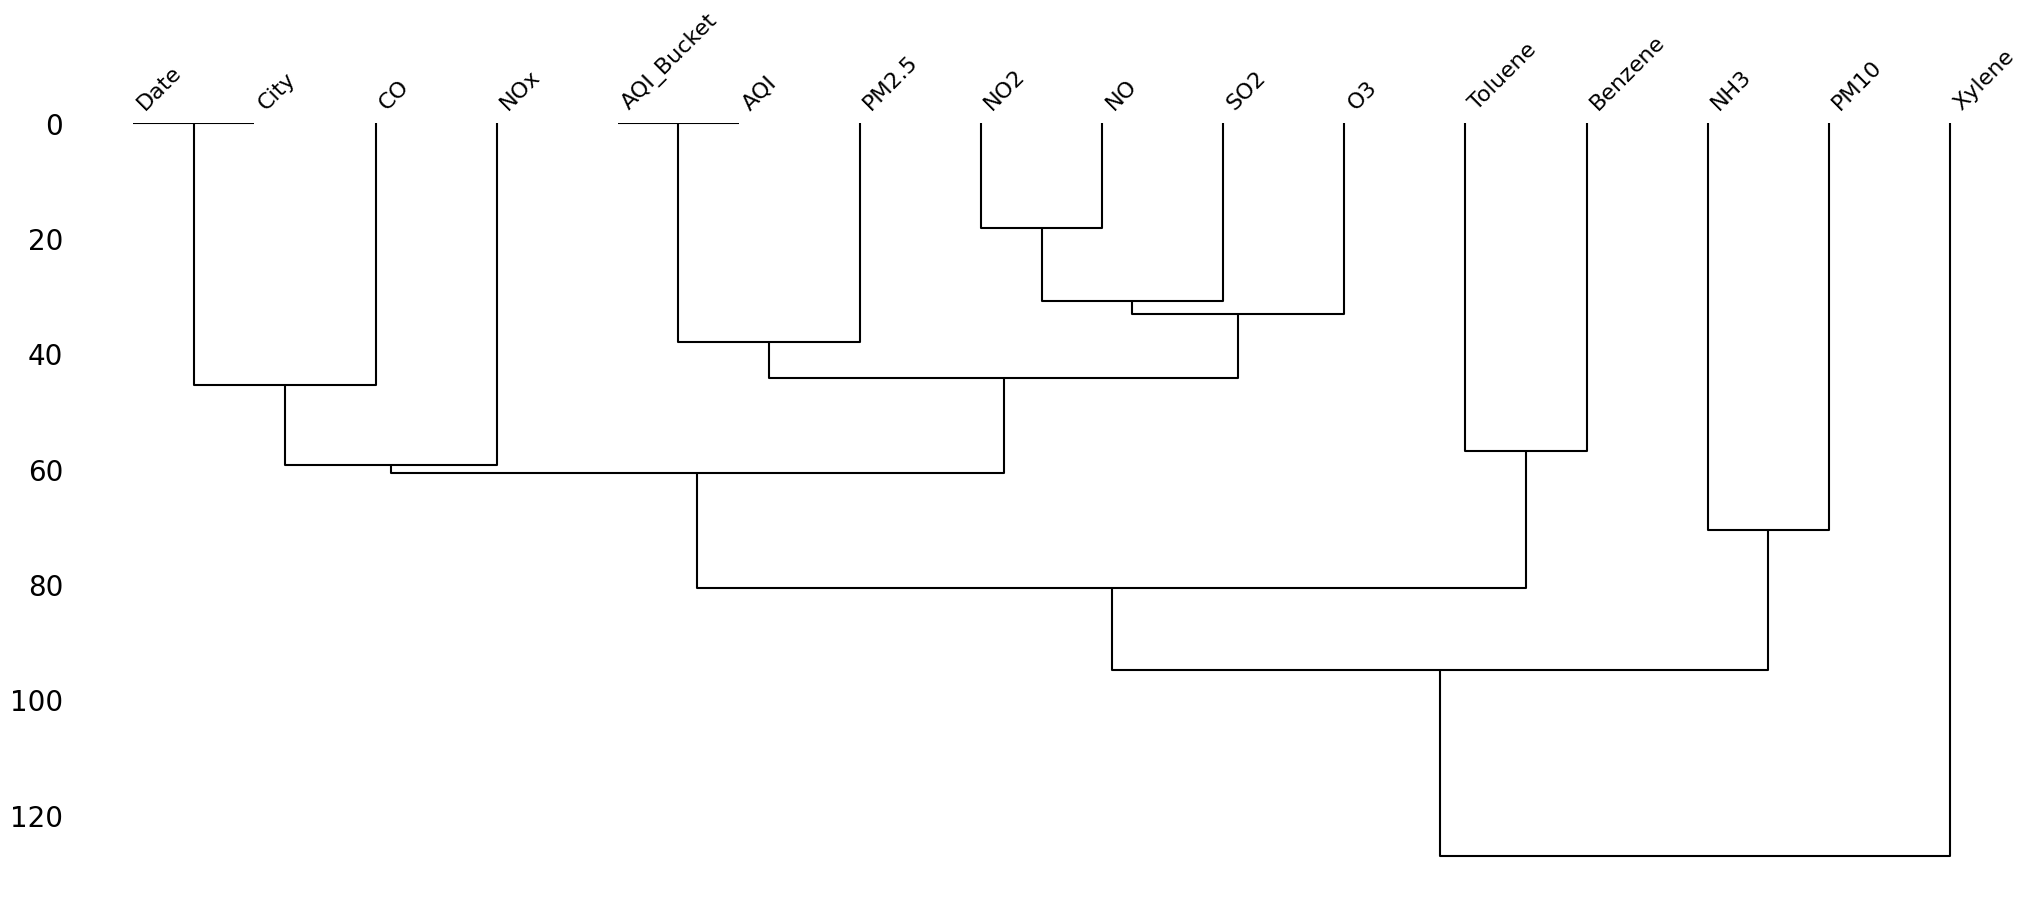

In [5]:
msno.dendrogram(main)

In [6]:
"""
Creating temporary object and copying main dataset to the object
Filling the missing data of all the columns using medain value
"""

dtemp = main.copy()

dtemp["PM2.5"] = dtemp["PM2.5"].fillna((dtemp["PM2.5"].median()))
dtemp["PM10"] = dtemp["PM10"].fillna((dtemp["PM10"].median()))
dtemp["NO"] = dtemp["NO"].fillna((dtemp["NO"].median()))
dtemp["NO2"] = dtemp["NO2"].fillna((dtemp["NO2"].median()))
dtemp["NOx"] = dtemp["NOx"].fillna((dtemp["NOx"].median()))
dtemp["NH3"] = dtemp["NH3"].fillna((dtemp["NH3"].median()))
dtemp["CO"] = dtemp["CO"].fillna((dtemp["CO"].median()))
dtemp["SO2"] = dtemp["SO2"].fillna((dtemp["SO2"].median()))
dtemp["O3"] = dtemp["O3"].fillna((dtemp["O3"].median()))
dtemp["Benzene"] = dtemp["Benzene"].fillna((dtemp["Benzene"].median()))
dtemp["Toluene"] = dtemp["Toluene"].fillna((dtemp["Toluene"].median()))
dtemp["Xylene"] = dtemp["Xylene"].fillna((dtemp["Xylene"].median()))
dtemp["AQI"] = dtemp["AQI"].fillna((dtemp["AQI"].median()))
dtemp["AQI_Bucket"] = dtemp["AQI_Bucket"].fillna("Moderate")


In [7]:
#Analyszing modified data

dtemp.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate
5,Ahmedabad,2015-01-06,48.57,95.68,45.41,38.48,81.50,15.85,45.41,45.76,46.51,5.42,10.83,1.93,118.0,Moderate
6,Ahmedabad,2015-01-07,48.57,95.68,112.16,40.62,130.77,15.85,112.16,32.28,33.47,0.00,0.00,0.00,118.0,Moderate
7,Ahmedabad,2015-01-08,48.57,95.68,80.87,36.74,96.75,15.85,80.87,38.54,31.89,0.00,0.00,0.00,118.0,Moderate
8,Ahmedabad,2015-01-09,48.57,95.68,29.16,31.00,48.00,15.85,29.16,58.68,25.75,0.00,0.00,0.00,118.0,Moderate
9,Ahmedabad,2015-01-10,48.57,95.68,9.89,7.04,0.00,15.85,0.89,8.29,4.55,0.00,0.00,0.00,118.0,Moderate


Data Manipulation

In [8]:
#Creating new object to hold Vehicular Emission Content dataset

df1 = dtemp.copy()

df1 = df1[df1["Date"] <= ("2021-01-01")]
df1 = df1.drop(["PM10","SO2","O3","Benzene","Toluene","Xylene"], axis=1)
df1["Vehicular Emission Content"] = df1["PM2.5"]+df1["NO"]+df1["NO2"]+df1["NOx"]+df1["NH3"]+df1["CO"]
df1.head()

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,AQI,AQI_Bucket,Vehicular Emission Content
0,Ahmedabad,2015-01-01,48.57,0.92,18.22,17.15,15.85,0.92,118.0,Moderate,101.63
1,Ahmedabad,2015-01-02,48.57,0.97,15.69,16.46,15.85,0.97,118.0,Moderate,98.51
2,Ahmedabad,2015-01-03,48.57,17.40,19.30,29.70,15.85,17.40,118.0,Moderate,148.22
3,Ahmedabad,2015-01-04,48.57,1.70,18.48,17.97,15.85,1.70,118.0,Moderate,104.27
4,Ahmedabad,2015-01-05,48.57,22.10,21.42,37.76,15.85,22.10,118.0,Moderate,167.80


In [9]:
#Creating another object to hold the Industrial Emission dataset

df2 = dtemp.copy()

df2 = df2[df2["Date"] <= ("2021-01-01")]
df2 = df2.drop(["PM2.5","NO","NO2","NOx","NH3","CO"], axis=1)
df2["Industrial Emission Content"] = df2["PM10"]+df2["SO2"]+df2["O3"]+df2["Benzene"]+df2["Toluene"]+df2["Xylene"]
df2.head()

,City,Date,PM10,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Industrial Emission Content
0,Ahmedabad,2015-01-01,95.68,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,256.70
1,Ahmedabad,2015-01-02,95.68,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,167.24
2,Ahmedabad,2015-01-03,95.68,29.07,30.70,6.80,16.40,2.25,118.0,Moderate,180.90
3,Ahmedabad,2015-01-04,95.68,18.59,36.08,4.43,10.14,1.00,118.0,Moderate,165.92
4,Ahmedabad,2015-01-05,95.68,39.33,39.31,7.01,18.89,2.78,118.0,Moderate,203.00


Data Visualization


In [10]:
df1["Vehicular Emission Content"].iplot(title = "Vehicular Emission in Cities", xTitle = "Cities", yTitle = "Vehicular Emission Content (in ug/m3)", color = "orange")
plt.show()

In [11]:
df2["Industrial Emission Content"].iplot(title = "Industiral Emission in Cities", xTitle = "Cities", yTitle = "Industrial Emission Content (in ug/m3)", color="blue")
plt.show()

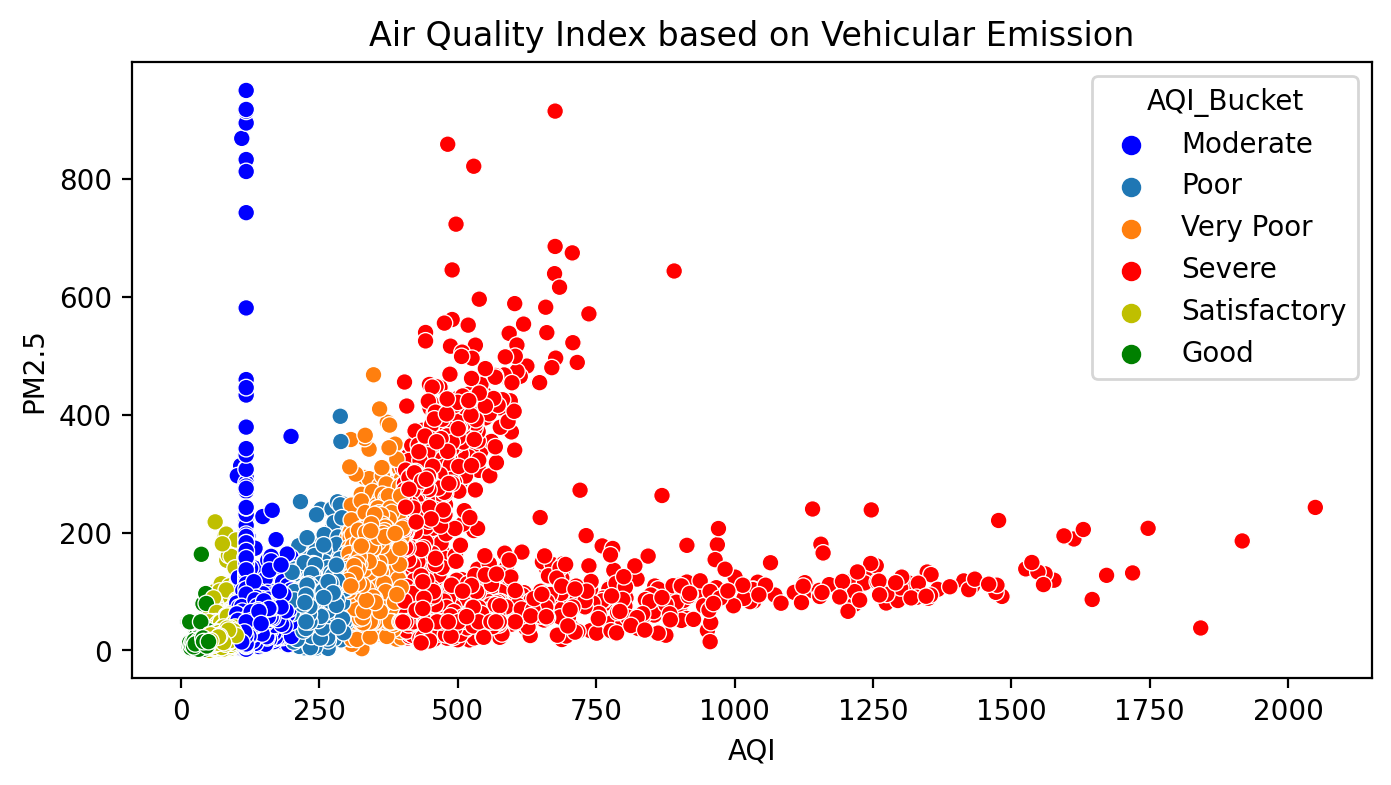

In [12]:
plt.figure(figsize=(8,4), dpi=200)
plt.title("Air Quality Index based on Vehicular Emission")
display = {"Good":"g","Satisfactory":"y","Moderate":"b","Poor":"C0","Very Poor":"C1","Severe":"r"}
sns.scatterplot(x = "AQI", y = "PM2.5", data = df1, hue = "AQI_Bucket", palette = display)
plt.show()

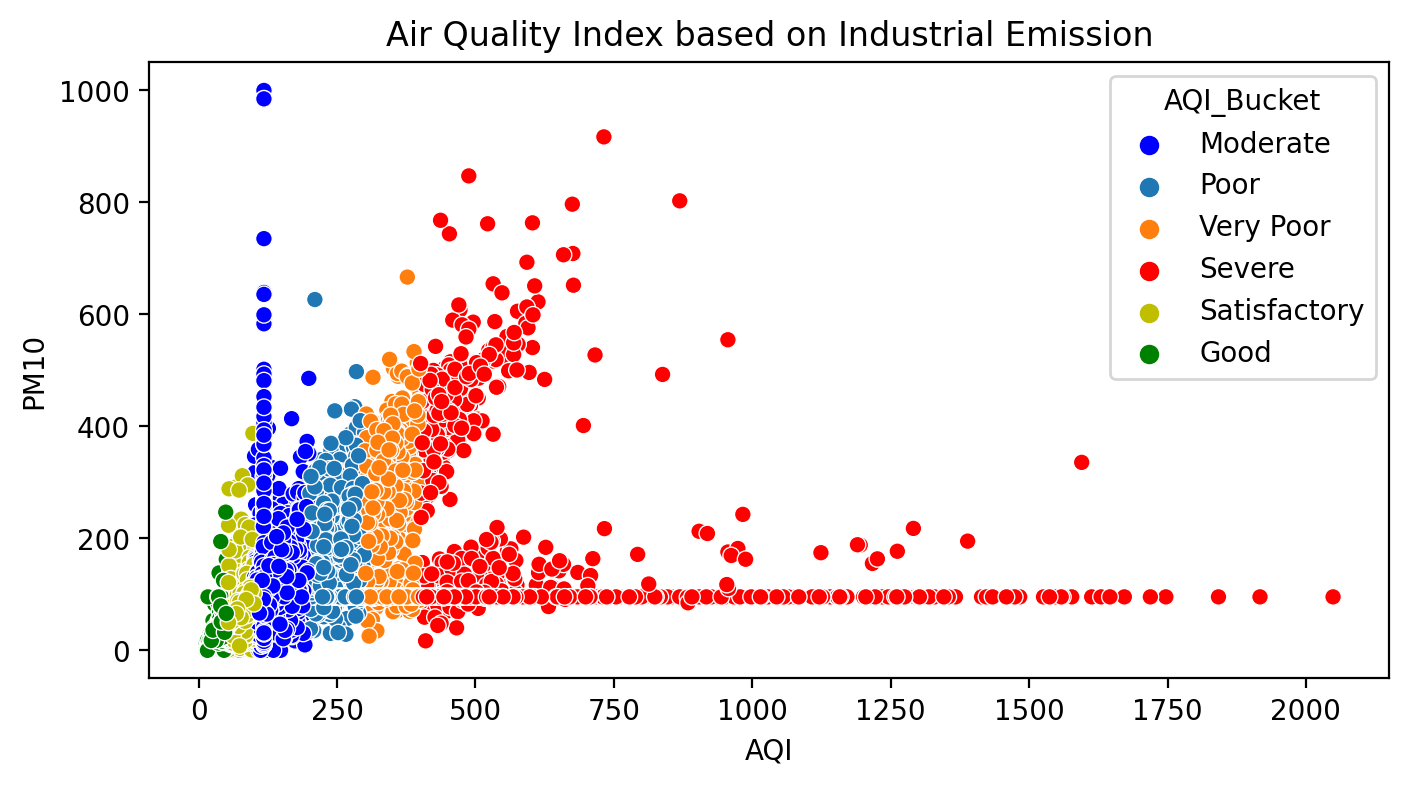

In [13]:
plt.figure(figsize=(8,4), dpi=200)
plt.title("Air Quality Index based on Industrial Emission")
display = {"Good":"g","Satisfactory":"y","Moderate":"b","Poor":"C0","Very Poor":"C1","Severe":"r"}
sns.scatterplot(x = "AQI", y = "PM10", data = df2, hue = "AQI_Bucket", palette = display)
plt.show()

Preprocessing

In [14]:
L = LabelEncoder()

